# Computational methods of Finance - Coursework

# Step 1: Installed yahoo finance

In [80]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: yfinance in c:\anaconda\lib\site-packages (0.1.55)



In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import matplotlib.pyplot as plt

# Historical last 1 year data of AAPL stock was downloaded from yahoo finance for the time period 01/03/2020 to 01/03/2021.

In [3]:
df = yf.download("AAPL", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


# Normal Return, log return and volatility calculation of AAPL stock for last 1 year

In [81]:
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.03175937730513228,
 0.046384624035637895,
 -0.03243691155050885,
 -0.013280070403156131,
 -0.07909227474615577]

In [82]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.03227464543162474,
 0.04534100745729214,
 -0.03297464850439739,
 -0.013369039089650274,
 -0.08239543748139669]

In [94]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized is %.8f' % (nr,nv))

The annulized normal return is 0.59588816 and its annulized is 0.45496942


# Last 1 year log return and last 1 year annulized volatility

In [86]:
log_return = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

In [95]:
vol = np.sqrt(252) * log_return.std()
print('The last one year annualised volatility is', round(vol*100,2), '%')

The last one year annualised volatility is 45.73 %


In [93]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)


# Graphical presentataion of closed prices

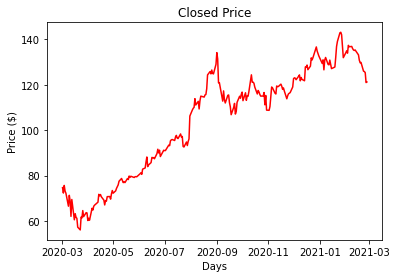

In [14]:
fig = plt.figure()
plt.plot(df['Close'], color= 'red')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

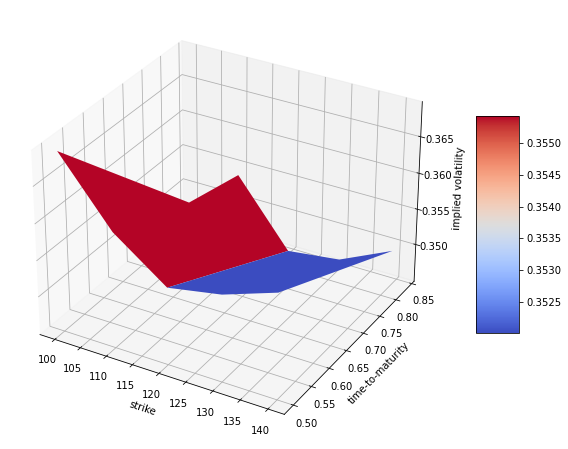

In [15]:
strike = np.array([100, 110, 120, 130, 140])
ttm = np.array([6/12, 10/12])
strike, ttm = np.meshgrid(strike, ttm)
v1 = np.array([0.369229563, 0.360583371, 0.355315095, 0.356638788, 0.359157824])
v2 = np.array([0.348106828, 0.354150754, 0.345219209, 0.346127746, 0.34955913])
iv = np.array([v1, v2])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5,);

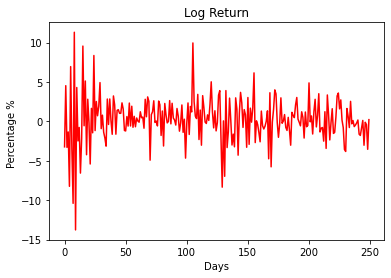

In [16]:
fig = plt.figure()
plt.plot(dflr * 100,color= 'red') 
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

# Historical last 6 months data of AAPL stock was downloaded from yahoo finance for the time period 01/09/2020 to 28/02/2021.

In [72]:
df1 = yf.download("AAPL", start="2020-09-01", end="2021-02-28")

[*********************100%***********************]  1 of 1 completed


# Last 6 months log return and 6 months annualised volatility

In [73]:
log_return1 = np.log(df1['Adj Close'] / df1['Adj Close'].shift(1))

In [96]:
vol = np.sqrt(252) * log_return1.std()
print('The last six months annualised volatility is', round(vol*100,2), '%')

The last six months annualised volatility is 37.78 %


# A) Option Pricing

# 1) Option pricing using Monte Carlo Simulation method

In [146]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [147]:
T = 1/12
r = 0.0154
sigma = 0.40
S0 = 121.08
K = 120

In [292]:
S = mcs_simulation_np(900) 

In [293]:
S = np.transpose(S)
S

array([[121.08      , 121.0847614 , 121.84136229, ..., 136.25726939,
        135.41561401, 136.01263936],
       [121.08      , 121.71102486, 121.06866197, ..., 113.57298964,
        113.20240846, 113.29981614],
       [121.08      , 121.16237451, 121.26795791, ..., 110.00492194,
        110.39754366, 111.1426879 ],
       ...,
       [121.08      , 121.42605214, 121.86411413, ..., 104.77155378,
        105.26606178, 105.70818971],
       [121.08      , 121.24850922, 122.51110478, ..., 128.95780587,
        128.41637699, 128.19752565],
       [121.08      , 121.14514048, 119.92737959, ..., 103.55639939,
        103.8120662 , 103.4163455 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

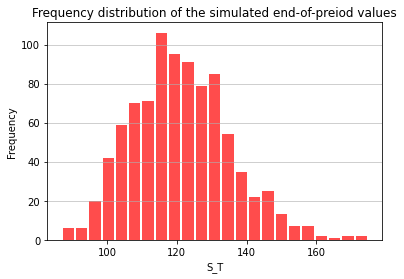

In [294]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='red',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [295]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Using Monte Carlo Simulation binary put option price is', str(bpp))

Using Monte Carlo Simulation binary put option price is 0.5027746947835738


In [296]:
cp = (S[-1,:]  - K)>0
bpc = np.mean(np.maximum(cp.astype(int),0))
print('Using Monte Carlo Simulation binary call option price is', str(bpc))

Using Monte Carlo Simulation binary call option price is 0.4972253052164262


# Put call parity

In [197]:
bpc + bpp

1.0

# 2) Option pricing using Black - Scholes model

In [110]:
def binary_option_bsm(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-q * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = np.exp(-q * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [111]:
binary_option_bsm(121.08, 120, 1/12, 0.0154, 0, 0.4, 'put')

0.48764569475037783

In [112]:
binary_option_bsm(121.08, 120, 1/12, 0.0154, 0, 0.4, 'call')

0.5123543052496222

# Put call parity

In [113]:
(binary_option_bsm(121.08, 120, 1/12, 0.0154, 0, 0.4, 'put')+binary_option_bsm(121.08, 120, 1/12, 0.0154, 0, 0.4, 'call'))

1.0

# B) Greeks Calculation

# 1) Delta calculation

In [38]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/(vol * S * np.sqrt(T))
    elif payoff == "put":
        delta =  - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/(vol * S * np.sqrt(T))
    
    return delta

In [41]:
print ('Delta of Binary call option is',delta (121.08, 120, 1/12, 0.0154, 0, 0.4, 'call'))

Delta of Binary call option is 0.028484108464339467


In [46]:
print ('Delta of Binary put option is',delta (121.08, 120, 1/12, 0.0154, 0, 0.4, 'put'))

Delta of Binary put option is -0.028484108464339467


In [43]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 120, 1/12, 0.0154, 0, 0.4, 'call')
    Delta_Put [i] = delta(S[i], 120, 1/12, 0.0154, 0, 0.4, 'put')

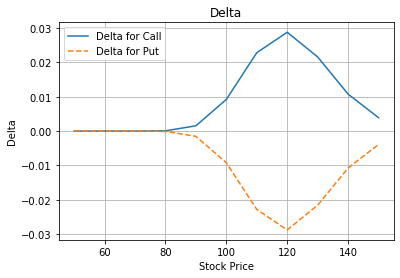

In [44]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [142]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 120, T[i], 0.0154, 0, 0.4, 'put')

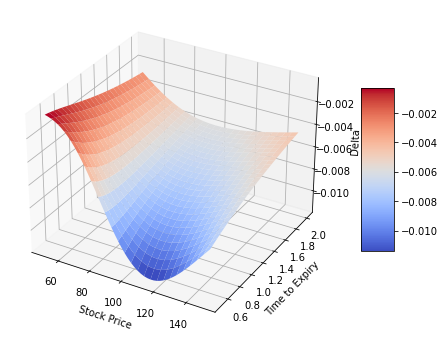

In [143]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# 2) Gamma calculation

In [45]:
def gamma(S, K, T, r, q, vol, payoff):
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        gamma = -(np.exp(-r * T) * d1* si.norm.pdf(d2, 0.0, 1.0) / (vol**2 * S**2 *(T)))
    elif payoff == "put":
        gamma = (np.exp(-r * T) * d1* si.norm.pdf(d2, 0.0, 1.0) / (vol**2 * S**2 *(T)))
    return gamma

In [49]:
print ('Gamma of Binary call option is',gamma(121.08, 120, 1/12, 0.0154, 0, 0.4, 'call'))

Gamma of Binary call option is -0.0002983516522106859


In [50]:
print ('Gamma of Binary call option is',gamma(121.08, 120, 1/12, 0.0154, 0, 0.4, 'put'))

Gamma of Binary call option is 0.0002983516522106859


In [51]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 120, 1/12, 0.0154, 0, 0.4, 'call')

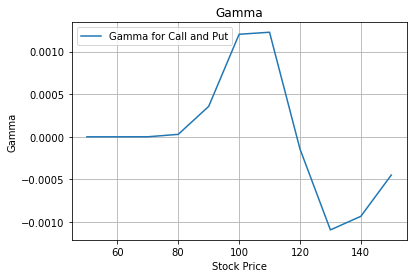

In [52]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [140]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 120, T[i], 0.0154, 0, 0.4, 'put')

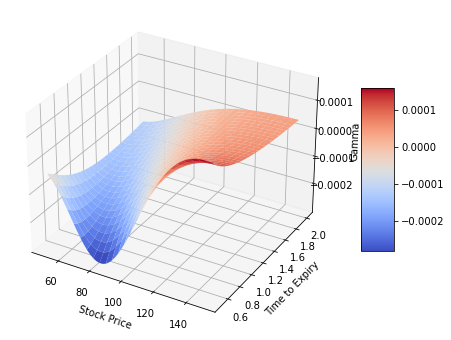

In [141]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# 3) Rho calculation

In [88]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  -1 * (T * np.exp(-r*T)*si.norm.cdf(d2, 0.0, 1.0)) + (((np.sqrt(T))/vol) * np.exp (-r * T) * si.norm.pdf(d2, 0.0, 1.0))
    elif payoff == "put":
        rho = -1 * (T * np.exp(-r*T)*(1-si.norm.cdf(d2, 0.0, 1.0))) - (((np.sqrt(T))/vol) * np.exp (-r * T) * si.norm.pdf(d2, 0.0, 1.0))
    
    return rho

In [89]:
print ('Rho of Binary call option is', rho(121.08, 120, 1/12, 0.0154, 0, 0.4, 'call'))

Rho of Binary call option is 0.24476322060349093


In [90]:
print ('Rho of Binary put option is', rho(121.08, 120, 1/12, 0.0154, 0, 0.4, 'put'))

Rho of Binary put option is -0.32798967808571916


In [130]:
r = np.linspace(0,0.4,5)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(121.08, 120, 1/12, r[i], 0, 0.4, 'call')
    Rho_Put [i] = rho(121.08, 120, 1/12, r[i], 0, 0.4, 'put')

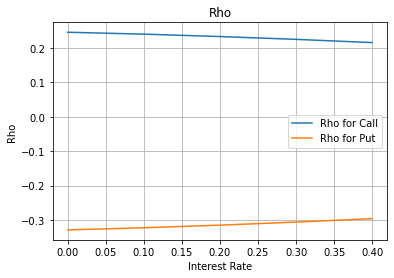

In [131]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [138]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 120, T[i], 0.0154, 0, 0.4, 'put')

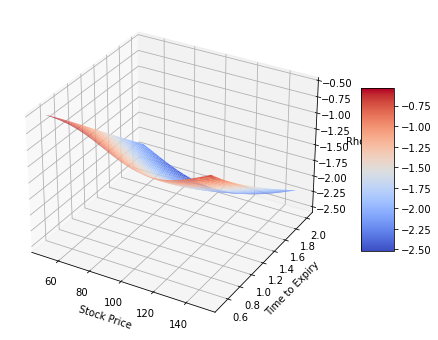

In [139]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# 4) Vega calculation

In [58]:
def vega(S, K, T, r, q, vol, payoff):
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        vega = -((np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((np.sqrt(T)) + (d2/vol)))
    elif payoff == "put":
        vega = (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((np.sqrt(T)) + (d2/vol))
    return vega

In [59]:
print ('Vega of Binary call option is',vega(121.08, 120, 1/12, 0.0154, 0, 0.4, 'call'))

Vega of Binary call option is -0.14579815124846746


In [60]:
print ('Vega of Binary put option is',vega(121.08, 120, 1/12, 0.0154, 0, 0.4, 'put'))

Vega of Binary put option is 0.14579815124846746


In [132]:
vol = np.linspace(0.1,0.6,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(121.08, 120, 1/12, 0.0154, 0, vol[i], 'call')

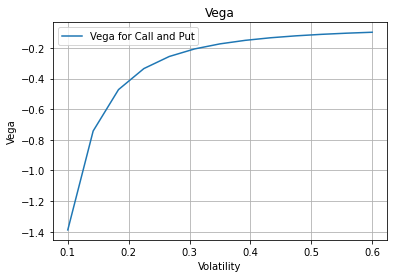

In [133]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [136]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 120, T[i], 0.0154, 0, 0.4, 'put')

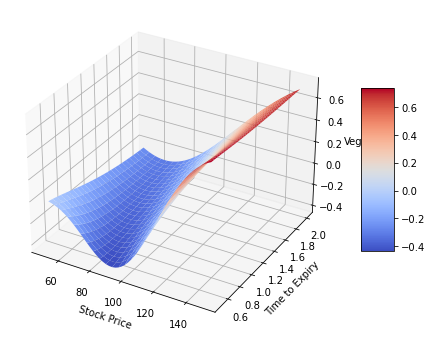

In [137]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

# 5) Speed calculation

In [63]:
def speed(S, K, T, r, q, vol, payoff):
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        speed =-((np.exp(-r*T)*si.norm.pdf(d2,0.0,1))/(vol**2*S**3*T))*(-2*d1 + (1-d1*d2)/(vol*np.sqrt(T)))
    elif payoff == "put":
        speed =((np.exp(-r*T)*si.norm.pdf(d2,0.0,1))/(vol**2*S**3*T))*(-2*d1 + (1-d1*d2)/(vol*np.sqrt(T)))
    return speed

In [64]:
print ('Speed of Binary call option is', speed(121.08,120,1/12,0.0154,0,0.4,'call'))

Speed of Binary call option is -0.00014013085131996946


In [65]:
print ('Speed of Binary put option is', speed(121.08,120,1/12,0.0154,0,0.4,'put'))

Speed of Binary put option is 0.00014013085131996946


In [120]:
S = np.linspace(80,180,15)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')

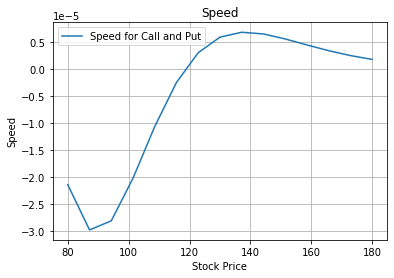

In [121]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

In [134]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 120, T[i], 0.0154, 0, 0.4, 'put')

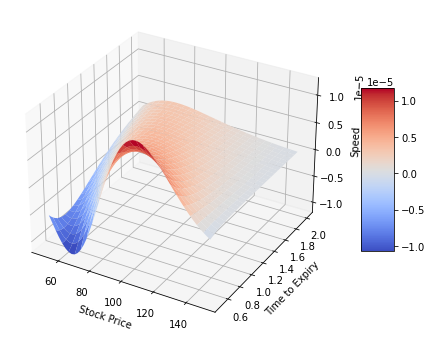

In [135]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);